In [1]:
from pathlib import Path

In [2]:
repo_dir = Path.cwd().parents[0]
repo_dir

PosixPath('/Users/ftod/GitHub/heart-disease')

In [3]:
import sys

sys.path.insert(0, f"{repo_dir}")

import missingno as msno
import numpy as np
import pandas as pd
import ydata_profiling

import heart_disease.constants as hdc
import heart_disease.data.get_dataset as hddgd  # FIXME: Add get_dataset to heart_disease?

/Users/ftod/.pyenv/versions/3.10.2/envs/ds/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/ftod/.pyenv/versions/3.10.2/envs/ds/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load data

In [5]:
hddgd.get_dataset()
combined_df = hddgd.validate_and_combine_dataset()

Downloaded the zip file to /Users/ftod/GitHub/heart-disease/data/raw/heart_disease.zip .
Extracted files to /Users/ftod/GitHub/heart-disease/data/raw .


In [6]:
print(combined_df.shape)
combined_df.head()

(920, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source,target
0,63,male,typical angina,145,233,high fasting blood sugar,left ventricular hypertrophy,150,no exercise induced angina,2.3,downsloping,0,fixed defect,cleveland,0
1,67,male,asymptomatic,160,286,low fasting blood sugar,left ventricular hypertrophy,108,exercise induced angina,1.5,flat,3,normal,cleveland,1
2,67,male,asymptomatic,120,229,low fasting blood sugar,left ventricular hypertrophy,129,exercise induced angina,2.6,flat,2,reversable defect,cleveland,1
3,37,male,non-anginal pain,130,250,low fasting blood sugar,normal,187,no exercise induced angina,3.5,downsloping,0,normal,cleveland,0
4,41,female,atypical angina,130,204,low fasting blood sugar,left ventricular hypertrophy,172,no exercise induced angina,1.4,upsloping,0,normal,cleveland,0


In [7]:
combined_df.dtypes

age            Int64
sex         category
cp          category
trestbps       Int64
chol           Int64
fbs         category
restecg     category
thalach        Int64
exang       category
oldpeak      float64
slope       category
ca             Int64
thal        category
source        object
target         int64
dtype: object

In [8]:
combined_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,<NA>,<NA>,<NA>,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,861.0,<NA>,<NA>,<NA>,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0
chol,890.0,<NA>,<NA>,<NA>,199.130337,110.78081,0.0,175.0,223.0,268.0,603.0
fbs,920,3,low fasting blood sugar,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,4,normal,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,865.0,<NA>,<NA>,<NA>,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
exang,920,3,no exercise induced angina,528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,858.0,NaN,NaN,NaN,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2


In [9]:
combined_df["target"].value_counts()

target
1    509
0    411
Name: count, dtype: int64

# Data profile

## ydata-profiling

In [10]:
profile = ydata_profiling.ProfileReport(
    df=combined_df,
    title="Profiling Report",
    explorative=True,
)

In [11]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## vscode-data-wrangler

In [13]:
# See <https://github.com/microsoft/vscode-data-wrangler> for instructions.
combined_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,source,target
0,63,male,typical angina,145,233,high fasting blood sugar,left ventricular hypertrophy,150,no exercise induced angina,2.3,downsloping,0,fixed defect,cleveland,0
1,67,male,asymptomatic,160,286,low fasting blood sugar,left ventricular hypertrophy,108,exercise induced angina,1.5,flat,3,normal,cleveland,1
2,67,male,asymptomatic,120,229,low fasting blood sugar,left ventricular hypertrophy,129,exercise induced angina,2.6,flat,2,reversable defect,cleveland,1
3,37,male,non-anginal pain,130,250,low fasting blood sugar,normal,187,no exercise induced angina,3.5,downsloping,0,normal,cleveland,0
4,41,female,atypical angina,130,204,low fasting blood sugar,left ventricular hypertrophy,172,no exercise induced angina,1.4,upsloping,0,normal,cleveland,0


# Missing data

In [15]:
# List of columns with nulls.
combined_df.columns[pd.isnull(combined_df).sum() > 0].values

array(['trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype=object)

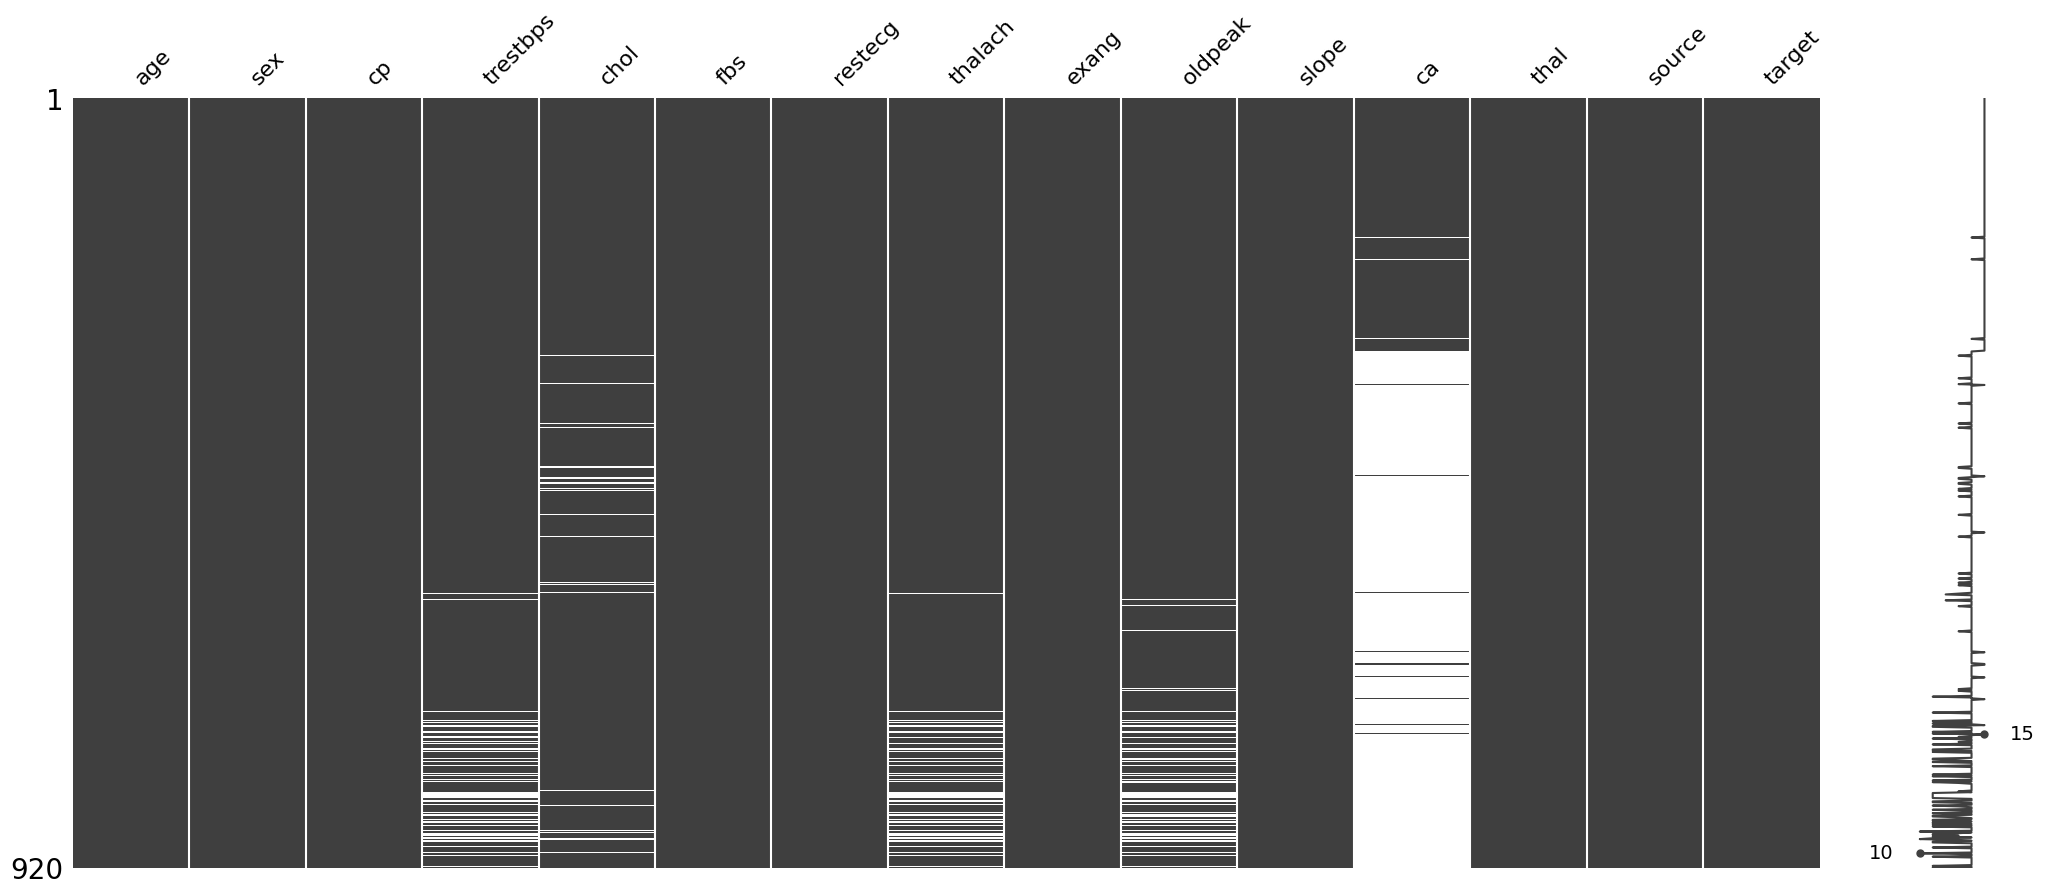

In [16]:
# Patterns in data completion.
msno.matrix(combined_df);

<Axes: >

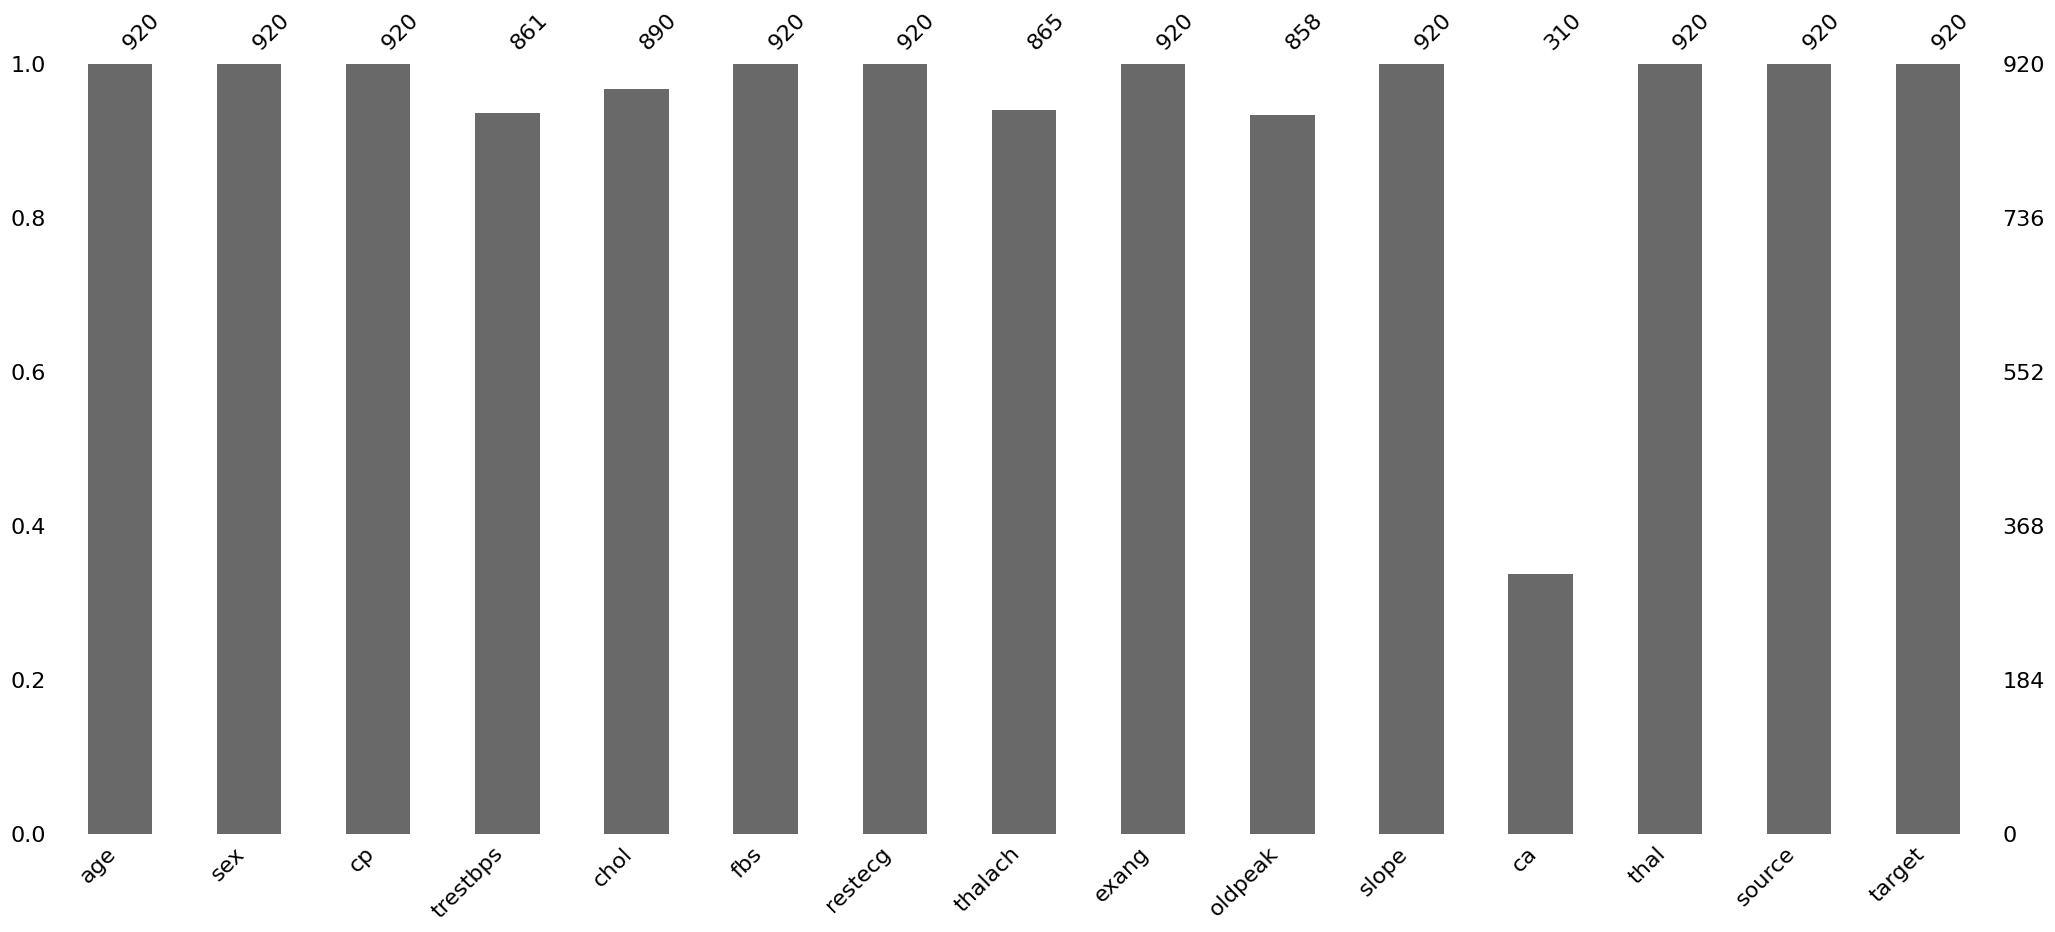

In [12]:
# Nullity by column.
msno.bar(combined_df);

<Axes: >

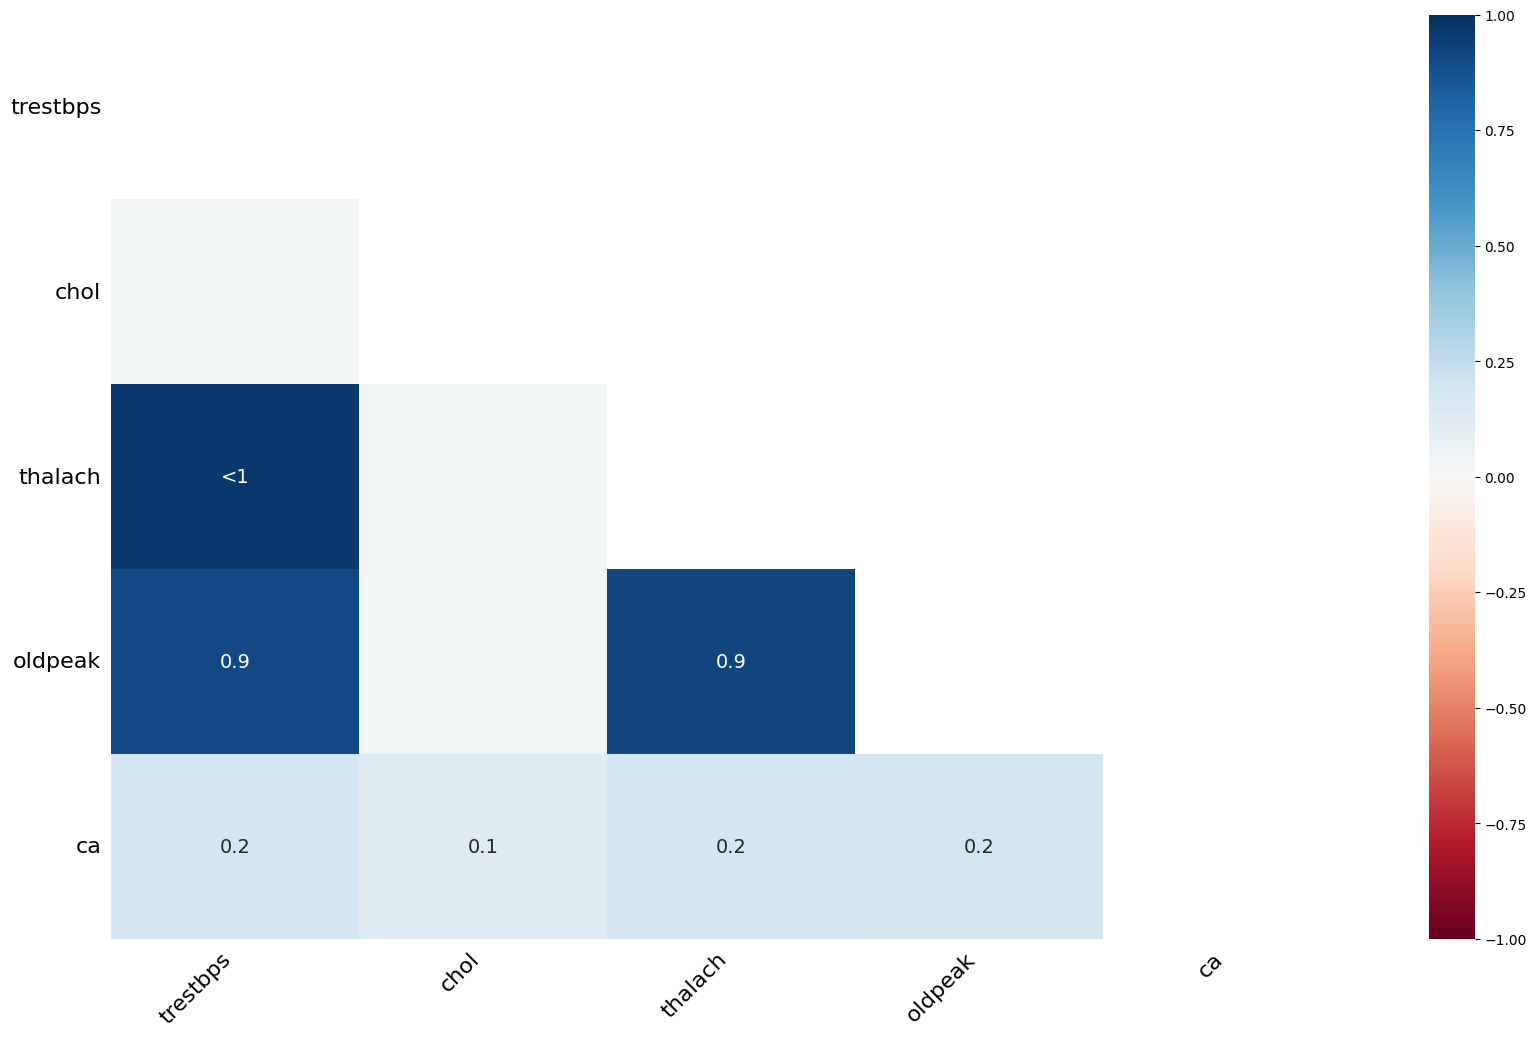

In [13]:
# Measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.
msno.heatmap(combined_df);

<Axes: >

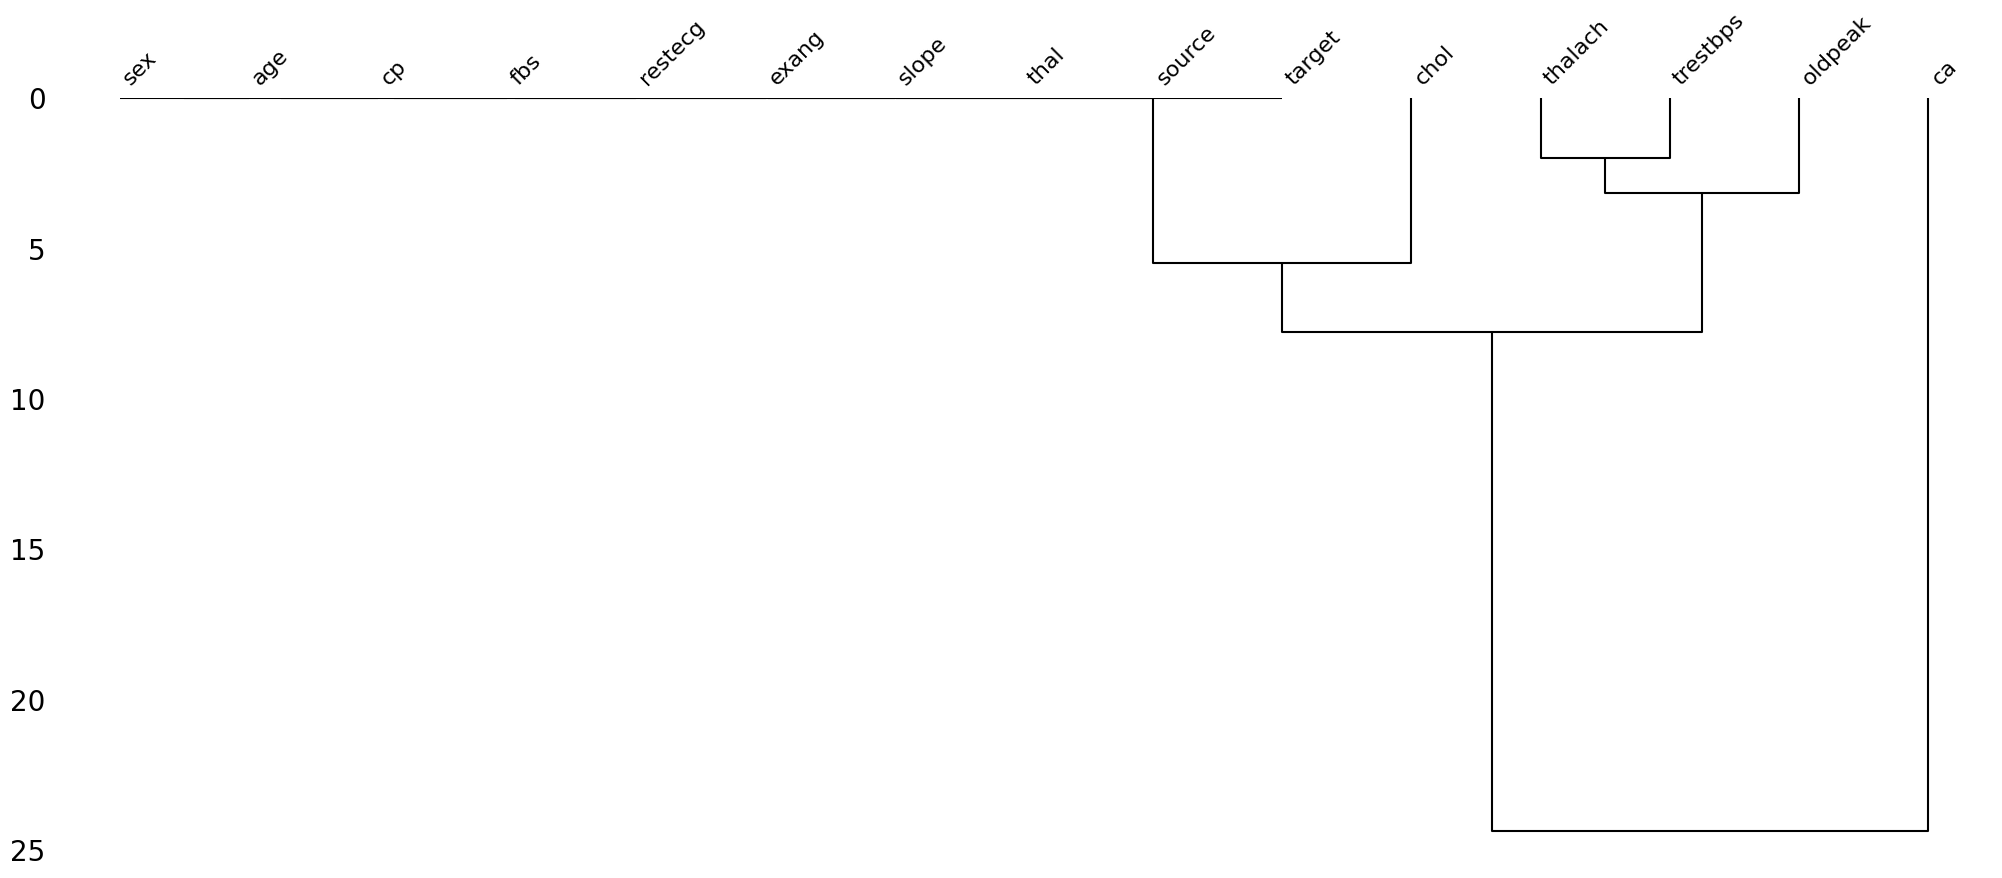

In [14]:
# Reveals trends deeper than the pairwise ones visible in the correlation heatmap.
msno.dendrogram(combined_df);